# Tutorial Assignment 4
- Student Name: Zheyuan Zhou 周喆媛  
- Student ID: 117010423  
- Date: 2020.4.9  

## (a) Import Libraries

In [1]:
#!/usr/bin/env Python3
# coding=utf-8
from math import log
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

## (b) Dataset Input

- Read the data from local file as excel: smokers.xls
- Rmoker is the dataset we apply analysis on, which for convenience only contain the ID_REF as primary key and drop the columns: Species Scientific Name and Gene Label
- Smoker_cp is the copy containing all the info of original file, in the case user want to find corresponding gene label

In [2]:
smoker_cp = pd.read_excel("./smokers.xls", sep="\t", index_col=0)
smoker = pd.read_excel("./smokers.xls", sep="\t", index_col=0)

smoker = smoker.drop("Gene Label", axis = 1)
smoker = smoker.drop("Species Scientific Name", axis =1)

print(smoker.head())
print("Data contains %d normalized probsets, %d samples." % smoker.shape)

             GSM101095    GSM101096    GSM101097    GSM101098    GSM101099  \
ID_REF                                                                       
1007_s_at  3884.318400  1657.214200  2237.643600  1474.739300  2231.866000   
1053_at      82.294170    74.921800    76.623764    54.349518    72.081345   
117_at       37.470535    77.169880    27.224297    29.231043    30.802940   
121_at      254.769700   173.070400   177.904650   135.697620   228.584460   
1255_g_at     9.972142     9.346519    11.320443     8.536531    10.041258   

             GSM101100    GSM101101    GSM101102    GSM101103    GSM101104  \
ID_REF                                                                       
1007_s_at  2535.999500  1956.101300  2298.428000  2410.525400  2495.134300   
1053_at      78.715040   101.283134   110.999010   114.482040    80.897100   
117_at       26.526035    24.233334    24.874979    26.564205    32.034077   
121_at      151.093810   168.721050   170.702000   149.034820  

## (c) Data Reorganization
- Observe the data, it is easy to notice that the number magnitude is diversed: from thousand to unit, which is not good for further analysis and visualization.
- Apply Log 2 transformation to reorder the number magnitude.
  
- **Print the smoker dataset head again, notice the data has already been transformed.**

In [4]:
dataset = ["GSM101095","GSM101096","GSM101097","GSM101098","GSM101099","GSM101100","GSM101101",
           "GSM101102","GSM101103","GSM101104","GSM101105","GSM101106","GSM101107","GSM101108",
           "GSM101109","GSM101110","GSM101111","GSM101112","GSM101113","GSM101114","GSM101115",
           "GSM101116"]
for target_col in dataset:
    smoker[target_col] = np.log2(smoker[target_col])
print(smoker.head())

           GSM101095  GSM101096  GSM101097  GSM101098  GSM101099  GSM101100  \
ID_REF                                                                        
1007_s_at  11.923446  10.694544  11.127765  10.526244  11.124035  11.308339   
1053_at     6.362718   6.227314   6.259720   5.764195   6.171554   6.298567   
117_at      5.227685   6.269966   4.766823   4.869429   4.944996   4.729337   
121_at      7.993050   7.435215   7.474960   7.084252   7.836584   7.239301   
1255_g_at   3.317903   3.224429   3.500859   3.093650   3.327868   3.175583   

           GSM101101  GSM101102  GSM101103  GSM101104  ...  GSM101107  \
ID_REF                                                 ...              
1007_s_at  10.933765  11.166432  11.235132  11.284902  ...  10.862893   
1053_at     6.662250   6.794403   6.838977   6.338016  ...   6.040537   
117_at      4.598921   4.636623   4.731412   5.001536  ...   5.301768   
121_at      7.398496   7.415336   7.219506   7.710828  ...   7.841813   
1255_g_a

## (d) Question 1
## Plot the gene expression value distribution among 22 samples
- One Histogram Graph
- Separated Histogram Graph
- One Histogram Graph with Kernel Density Estimation
- Separated Histogram Graph with Kernel Density Estimation
- Box Plot

**Plot a histogram of the subject group of 22 samples**  

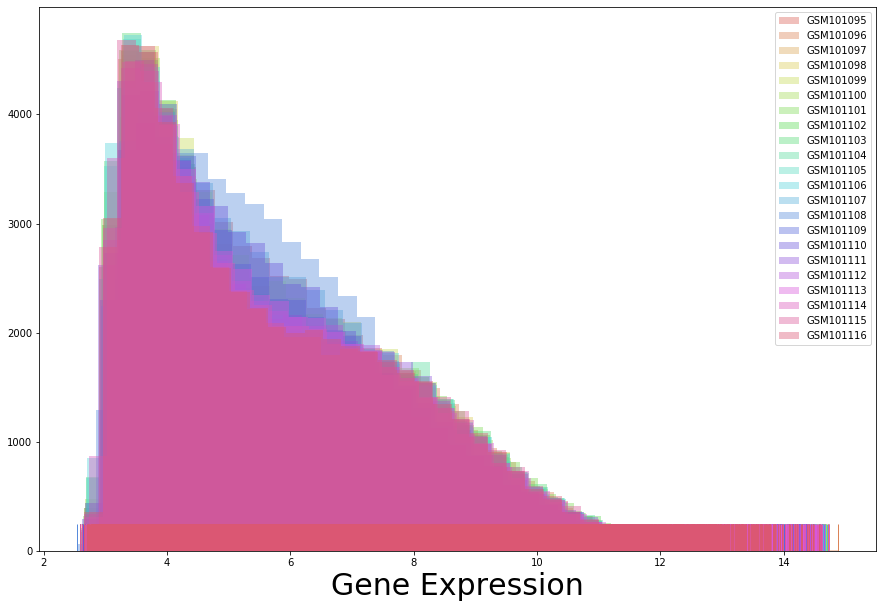

In [5]:
plt.figure(figsize=[15,10])
with sns.color_palette('hls',22):
    for target in dataset:
        ax = sns.distplot(smoker[target], bins=40, label=target, rug=True, kde=False)
plt.xlabel("Gene Expression", size = 30)
lgd = plt.legend()

**Plot a histogram for each sample respectively**  
Notice the y axis range in these figures are almost the same, therefore it is still easy for us to compare the data.

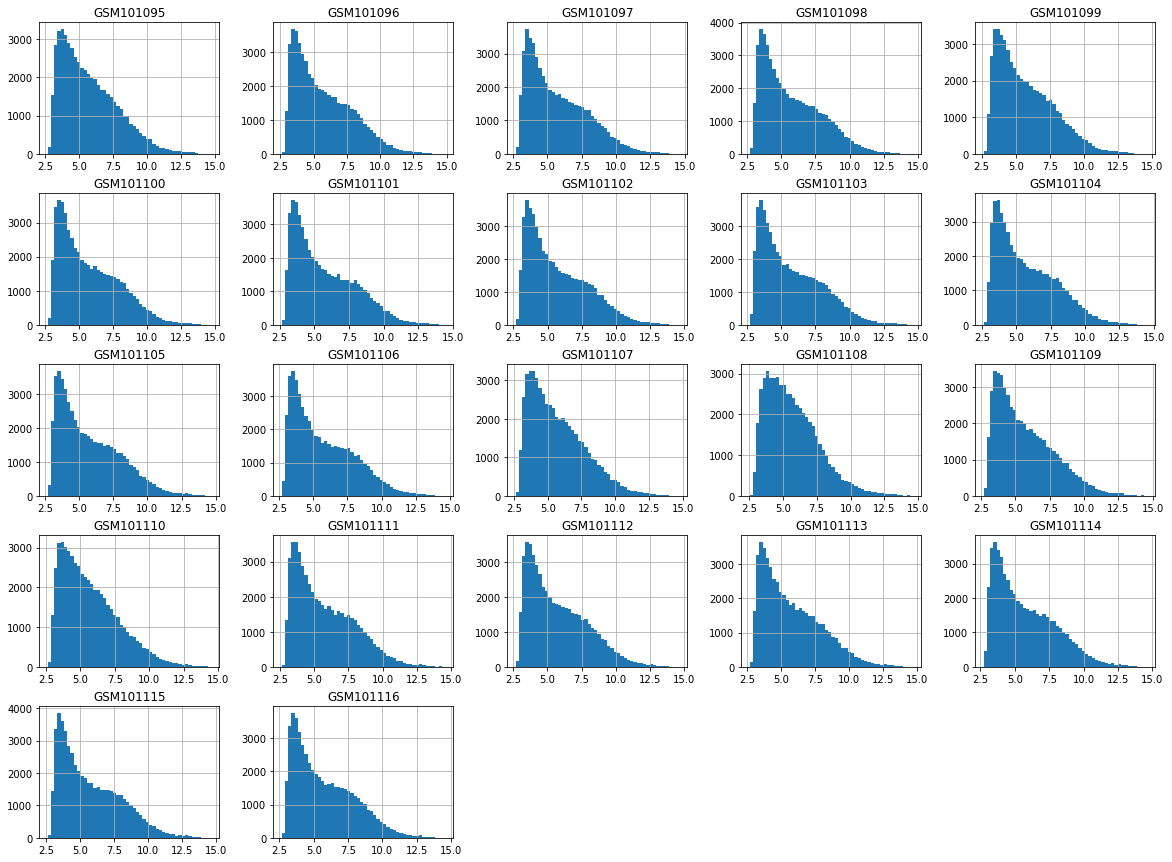

In [6]:
smoker.hist(bins=50, figsize=(20,15))
plt.show()

**Plot a histogram of the subject group of 22 samples with kde**  

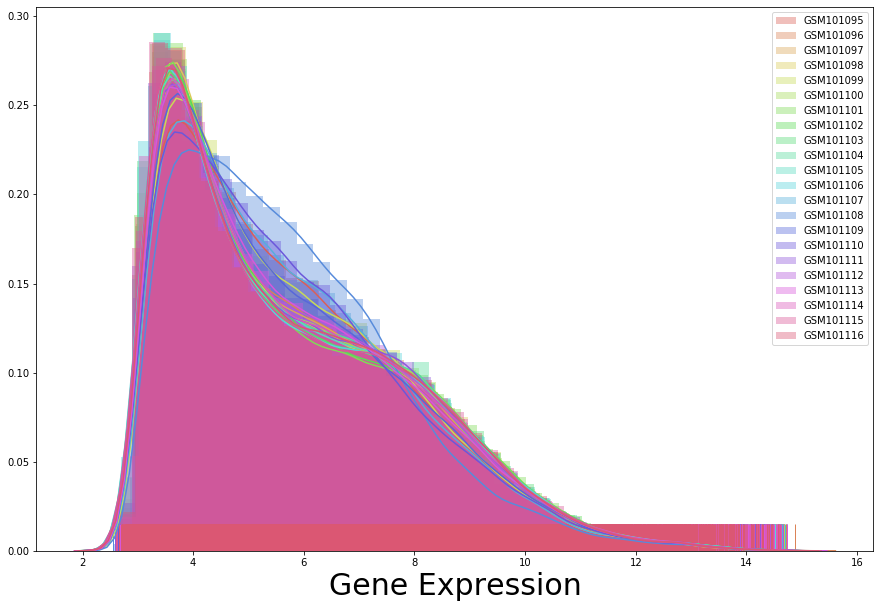

In [7]:
plt.figure(figsize=[15,10])
with sns.color_palette('hls',22):
    for target in dataset:
        ax = sns.distplot(smoker[target], bins=40, label=target, rug=True, kde=True)
plt.xlabel("Gene Expression", size = 30)
lgd = plt.legend()

**Plot a histogram with kde for each sample respectively**  
Notice the y axis range in these figures are almost the same, therefore it is still easy for us to compare the data

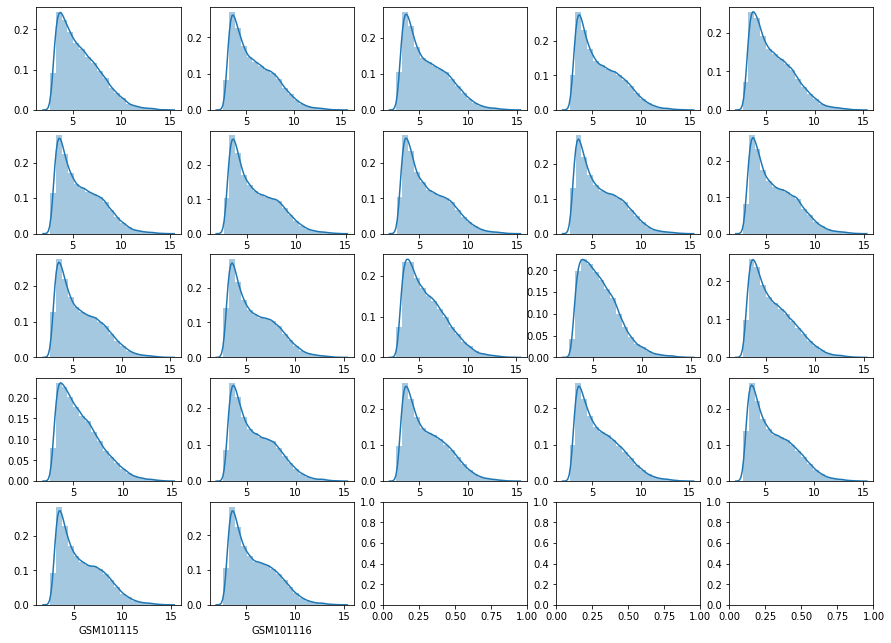

In [8]:
fig, axes = plt.subplots(5,5,figsize = (15,11))
count = 0
with sns.color_palette('hls',22):
    for target in dataset:
        ax.set_ylim(0,0.3)
        sns.distplot(smoker[target], bins=20, label=target, rug=False, kde=True, ax = axes[count//5][count%5])
        count = count+1

**Considering the histogram for 22 samples does hard to see the details, choose box plot to vitualize the data**  

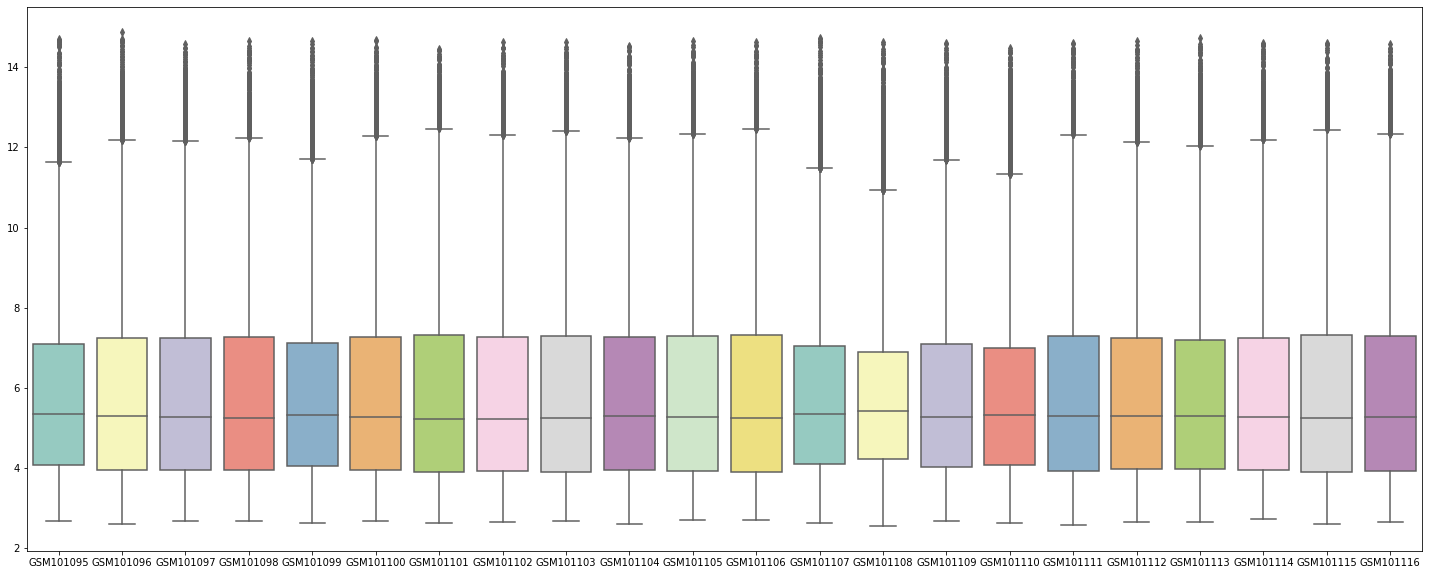

In [9]:
plt.figure(figsize=[25,10])
sns.boxplot(data=smoker,palette="Set3") 

## Question 1 Quiz: Why normalization is required for microarray data?  
## Anwser   
1. Normalization is a process of eliminating the variations caused by differential labelling efficiency of teh two fluorescent dyes or different amounts of starting mRNA material in two samples. This process is suitable for this dataset: firstly, the dataset is consisted by different samples from different people sets, existing large possibility to have variation; secondly, as the reason we apply log2 normalization, it is obvious that the data varies large quantile in magnitude amount: some are thousands, some are units, which is abnormal, even after log transformation.
2. For such a large, random dataset, the result of the distribution should be closed to **Normal Distribution**.  
However, as we can observed from all the above figures that firstly, the central axis of the distribution **deviates from the central** from the range 0 to 16, most of the samples (global maximum value) accumulate at 3 to 5; secondly, the figure is **asystemitric**. This phenomenon is actually abnormal for a large dataset, which indicates there exists noise points or something else need to be refined by normalization.
3. The differences between two sets of samples(smokers and non-smokers) are hard to tell directly from the original figure, since the base number of the dataset is quite large, therefore even if the differences between samples seems small in some places, it could exist larger differential expression than we thought. In this perspective, normalization is also needed.


## (e) Filter Genes
Before we perform unsupervised learning to explore the gene expression data, a common procedure is to filter out genes with low variance as they may simply represent noise. We can rank genes based on the variances across the dataset and select the 80% most variant probsets for use in the incoming analysis.

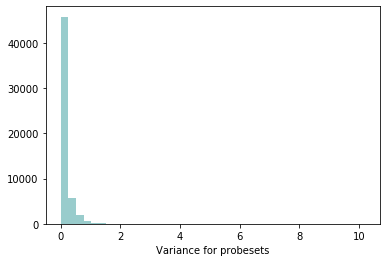

In [10]:
var_smoker = smoker.var(axis=1)
sns.distplot(var_smoker, bins=40, kde=False, color="#008080")
lab = plt.xlabel("Variance for probesets")
#plt.xlim([0, 25])

In [11]:
smoker_filt = smoker[pd.qcut(var_smoker, q=5, labels=False)  > 0]
print("Futher filtered dataset: %d filtered probsets, %d samples." % smoker_filt.shape)

Futher filtered dataset: 43690 filtered probsets, 22 samples.


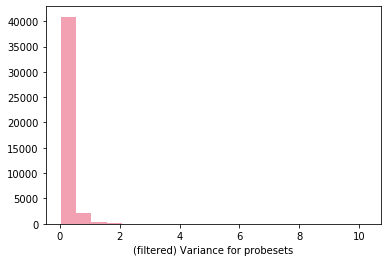

In [12]:
varsmoker_filt = smoker_filt.var(axis=1)
sns.distplot(varsmoker_filt, bins=20, kde=False, color="#dc143c")
lab = plt.xlabel("(filtered) Variance for probesets")
#plt.xlim(0, 25)

## (f) Question 2 + 3: Wilcoxon Signed-Rank test, Paired Sample T-Test and Visualization
- Wilcoxon Signed-Rank Test
- Wilcoxon Signed-Rank Test Visualization
- Paired Sample T-Test
- Paired Sample T-Test Visualization

**Divide two sets of samples according to labele.txt.**  
Notice that in order to make the balance to apply paired analysis, delete the final two samples in non_smoker_list.  
The current result is 10 samples for each list.

In [59]:
non_smoker_list = ["GSM101095","GSM101096","GSM101097","GSM101098","GSM101099",
                   "GSM101100","GSM101101","GSM101102","GSM101103","GSM101104"]
smoker_list = ["GSM101107", "GSM101108", "GSM101109", "GSM101110", "GSM101111",
               "GSM101112", "GSM101113", "GSM101114", "GSM101115", "GSM101116"]

**(a) Wilcoxon sign-rank test**
- Setting P-Value is actually essential and here, we set it to be 0.006 instead of 0.05.
- Actually p-value = 0.05 is suitable for the analysis according to the original article: ***Pauwels RA, Buist AS, Calverley PM, Jenkins CR, Hurd SS (2001) Global strategy for the diagnosis, management, and prevention of chronic obstructive pulmonary disease. NHLBI/WHO Global Initiative for Chronic Obstructive Lung Disease (GOLD) workshop summary. Am J Respir Crit Care Med 163:1256–1276***.
- However, we choose this p-value to generate a more strict result for the further dendrogram and clustering, since if the left data is too large, the dendrogram is hard to visualize without using *fastcluster* library.
- The p-value = 0.006 finally gives us **404 differential expressions**, which is acceptable.

In [60]:
significant_inds_wilcox, significant_pvals_wilcox = [], []
for ii in smoker_filt.index:
    pval = stats.wilcoxon(smoker_filt[non_smoker_list].loc[ii], smoker_filt[smoker_list].loc[ii], alternative="two-sided").pvalue
    if pval < 0.006:
        significant_inds_wilcox.append(ii)
        significant_pvals_wilcox.append(pval)
        print("%s is significant probeset, with pvalue=%4f" % (ii, pval))
print(len(significant_inds_wilcox))

1552307_a_at is significant probeset, with pvalue=0.005062
1552497_a_at is significant probeset, with pvalue=0.005062


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


1552834_at is significant probeset, with pvalue=0.005062
1553172_at is significant probeset, with pvalue=0.005062
1553602_at is significant probeset, with pvalue=0.005062
1553709_a_at is significant probeset, with pvalue=0.005062
1553994_at is significant probeset, with pvalue=0.005062
1553995_a_at is significant probeset, with pvalue=0.005062
1555824_a_at is significant probeset, with pvalue=0.005062
1556467_at is significant probeset, with pvalue=0.005062
1556616_a_at is significant probeset, with pvalue=0.005062
1557038_s_at is significant probeset, with pvalue=0.005062
1557117_at is significant probeset, with pvalue=0.005062
1557158_s_at is significant probeset, with pvalue=0.005062
1557632_at is significant probeset, with pvalue=0.005062
1557719_at is significant probeset, with pvalue=0.005062
1557797_a_at is significant probeset, with pvalue=0.005062
1557965_at is significant probeset, with pvalue=0.005062
1558019_at is significant probeset, with pvalue=0.005062
1558703_at is sig

211628_x_at is significant probeset, with pvalue=0.005062
211653_x_at is significant probeset, with pvalue=0.005062
211657_at is significant probeset, with pvalue=0.005062
211774_s_at is significant probeset, with pvalue=0.005062
211778_s_at is significant probeset, with pvalue=0.005062
212281_s_at is significant probeset, with pvalue=0.005062
212282_at is significant probeset, with pvalue=0.005062
212323_s_at is significant probeset, with pvalue=0.005062
212326_at is significant probeset, with pvalue=0.005062
212399_s_at is significant probeset, with pvalue=0.005062
212419_at is significant probeset, with pvalue=0.005062
212429_s_at is significant probeset, with pvalue=0.005062
212496_s_at is significant probeset, with pvalue=0.005062
212590_at is significant probeset, with pvalue=0.005062
212838_at is significant probeset, with pvalue=0.005062
212914_at is significant probeset, with pvalue=0.005062
212916_at is significant probeset, with pvalue=0.005062
213182_x_at is significant pro

227334_at is significant probeset, with pvalue=0.005062
227405_s_at is significant probeset, with pvalue=0.005062
227475_at is significant probeset, with pvalue=0.005062
227515_at is significant probeset, with pvalue=0.005062
227516_at is significant probeset, with pvalue=0.005062
227558_at is significant probeset, with pvalue=0.005062
227572_at is significant probeset, with pvalue=0.005062
227593_at is significant probeset, with pvalue=0.005062
227615_at is significant probeset, with pvalue=0.005062
227702_at is significant probeset, with pvalue=0.005062
227742_at is significant probeset, with pvalue=0.005062
228055_at is significant probeset, with pvalue=0.005062
228093_at is significant probeset, with pvalue=0.005062
228303_at is significant probeset, with pvalue=0.005062
228412_at is significant probeset, with pvalue=0.005062
228461_at is significant probeset, with pvalue=0.005062
228490_at is significant probeset, with pvalue=0.005062
228710_at is significant probeset, with pvalue

**(b) Wilcoxon sign-rank test Vistualization**  
  
**select Gene: '1552307_a_at','1552497_a_at','1552834_at'**  
- Bar Plot
- Scatter Plot

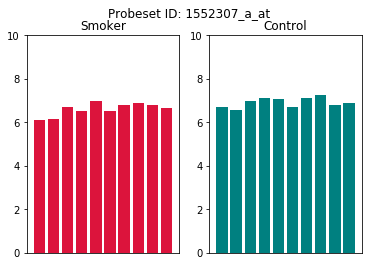

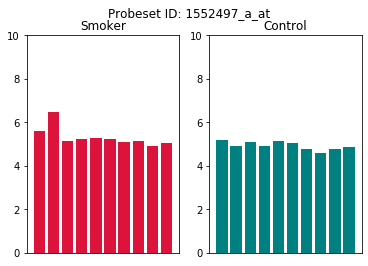

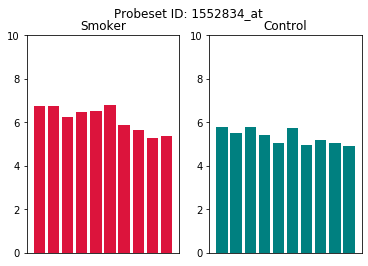

In [61]:
select_w_list= ['1552307_a_at','1552497_a_at','1552834_at']
smoker_wilcox = smoker_filt[non_smoker_list + smoker_list].loc[select_w_list]
for ii in smoker_wilcox.index:
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.bar(smoker_list, smoker_wilcox[smoker_list].loc[ii], color="#dc143c")
    plt.xticks(''); plt.title("Smoker"); plt.ylim(0, 10)
    ax2 = fig.add_subplot(122)
    ax2.bar(smoker_list, smoker_wilcox[non_smoker_list].loc[ii], color="#008080")
    plt.xticks(''); plt.title("Control"); plt.ylim(0, 10)
    fig.suptitle("Probeset ID: %s" % ii)

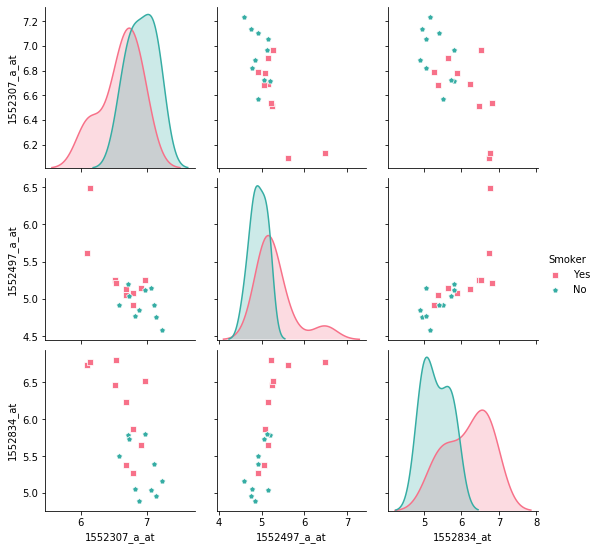

In [62]:
# Scatter plots combining the probesets
df_scatter_s = smoker_wilcox[smoker_list].T
df_scatter_s['Smoker'] = 'Yes'
df_scatter_c = smoker_wilcox[non_smoker_list].T
df_scatter_c['Smoker'] = 'No'
df_scatter = pd.concat([df_scatter_s, df_scatter_c], axis=0)
# print(df_scatter)
# print(df_scatter.index)
# Pairplot
pp = sns.pairplot(df_scatter, hue='Smoker', diag_kind='auto', markers=['s', 'p'], palette="husl")

**(c) T-test**
- Setting P-Value is actually essential and here, we set it to be 0.003 instead of 0.05.
- Actually p-value = 0.05 is suitable for the analysis according to the original article: ***Pauwels RA, Buist AS, Calverley PM, Jenkins CR, Hurd SS (2001) Global strategy for the diagnosis, management, and prevention of chronic obstructive pulmonary disease. NHLBI/WHO Global Initiative for Chronic Obstructive Lung Disease (GOLD) workshop summary. Am J Respir Crit Care Med 163:1256–1276***.
- However, we choose this p-value to generate a more strict result for the further dendrogram and clustering, since if the left data is too large, the dendrogram is hard to visualize without using *fastcluster* library.
- The p-value = 0.006 finally gives us **642 differential expressions**, which is acceptable but it would be better to use *fastcluster*.
- Notice the p-value compared to the Wilcoxon sign-rank test is even smaller with more differential expressions, which reflects Wilcoxon sign-rank test might be a more strict method in this problem

In [63]:
significant_inds_ttest, significant_pvals_ttest = [], []
for ii in smoker_filt.index:
    pval = stats.ttest_rel(smoker_filt[non_smoker_list].loc[ii], smoker_filt[smoker_list].loc[ii]).pvalue
    if pval < 0.003:
        significant_inds_ttest.append(ii)
        significant_pvals_ttest.append(pval)
        print("%s is significant probeset, with pvalue=%4f" % (ii, pval))
print(len(significant_inds_ttest))

1552307_a_at is significant probeset, with pvalue=0.000734
1552833_at is significant probeset, with pvalue=0.001770
1552834_at is significant probeset, with pvalue=0.000117
1553172_at is significant probeset, with pvalue=0.000126
1553602_at is significant probeset, with pvalue=0.000005
1553704_x_at is significant probeset, with pvalue=0.000575
1553709_a_at is significant probeset, with pvalue=0.000588
1553729_s_at is significant probeset, with pvalue=0.000685
1553961_s_at is significant probeset, with pvalue=0.002265
1553994_at is significant probeset, with pvalue=0.000737
1553995_a_at is significant probeset, with pvalue=0.000100
1554085_at is significant probeset, with pvalue=0.002918
1554168_a_at is significant probeset, with pvalue=0.001449
1554182_at is significant probeset, with pvalue=0.002013
1554190_s_at is significant probeset, with pvalue=0.000953
1555095_at is significant probeset, with pvalue=0.002860
1555824_a_at is significant probeset, with pvalue=0.000334
1555854_at is

204607_at is significant probeset, with pvalue=0.000802
204675_at is significant probeset, with pvalue=0.001934
204967_at is significant probeset, with pvalue=0.002955
204970_s_at is significant probeset, with pvalue=0.001086
205221_at is significant probeset, with pvalue=0.001127
205241_at is significant probeset, with pvalue=0.002041
205267_at is significant probeset, with pvalue=0.001203
205324_s_at is significant probeset, with pvalue=0.000728
205328_at is significant probeset, with pvalue=0.000023
205379_at is significant probeset, with pvalue=0.000796
205383_s_at is significant probeset, with pvalue=0.000393
205429_s_at is significant probeset, with pvalue=0.001555
205499_at is significant probeset, with pvalue=0.000060
205513_at is significant probeset, with pvalue=0.002036
205535_s_at is significant probeset, with pvalue=0.000361
205566_at is significant probeset, with pvalue=0.000681
205621_at is significant probeset, with pvalue=0.000107
205623_at is significant probeset, wit

216742_at is significant probeset, with pvalue=0.002825
216894_x_at is significant probeset, with pvalue=0.001063
217182_at is significant probeset, with pvalue=0.001556
217526_at is significant probeset, with pvalue=0.001226
217546_at is significant probeset, with pvalue=0.001020
217626_at is significant probeset, with pvalue=0.000261
217678_at is significant probeset, with pvalue=0.000919
217775_s_at is significant probeset, with pvalue=0.000747
217948_at is significant probeset, with pvalue=0.001726
217978_s_at is significant probeset, with pvalue=0.002133
218023_s_at is significant probeset, with pvalue=0.000245
218218_at is significant probeset, with pvalue=0.002079
218229_s_at is significant probeset, with pvalue=0.000284
218378_s_at is significant probeset, with pvalue=0.001065
218398_at is significant probeset, with pvalue=0.001368
218412_s_at is significant probeset, with pvalue=0.000707
218418_s_at is significant probeset, with pvalue=0.000446
218443_s_at is significant probe

226093_at is significant probeset, with pvalue=0.000067
226116_at is significant probeset, with pvalue=0.000760
226139_at is significant probeset, with pvalue=0.002316
226176_s_at is significant probeset, with pvalue=0.000904
226194_at is significant probeset, with pvalue=0.000216
226213_at is significant probeset, with pvalue=0.002488
226224_at is significant probeset, with pvalue=0.002804
226226_at is significant probeset, with pvalue=0.001320
226336_at is significant probeset, with pvalue=0.002163
226443_at is significant probeset, with pvalue=0.000281
226509_at is significant probeset, with pvalue=0.000084
226572_at is significant probeset, with pvalue=0.001758
226780_s_at is significant probeset, with pvalue=0.002010
226781_at is significant probeset, with pvalue=0.000107
226787_at is significant probeset, with pvalue=0.001506
226955_at is significant probeset, with pvalue=0.001899
226976_at is significant probeset, with pvalue=0.002668
227084_at is significant probeset, with pval

237721_s_at is significant probeset, with pvalue=0.002886
238369_s_at is significant probeset, with pvalue=0.002688
238425_at is significant probeset, with pvalue=0.002581
238755_at is significant probeset, with pvalue=0.000060
238999_at is significant probeset, with pvalue=0.001372
239021_at is significant probeset, with pvalue=0.001830
239093_at is significant probeset, with pvalue=0.000212
239142_at is significant probeset, with pvalue=0.002077
239205_s_at is significant probeset, with pvalue=0.000703
239207_at is significant probeset, with pvalue=0.002516
239229_at is significant probeset, with pvalue=0.000613
239283_at is significant probeset, with pvalue=0.001007
239433_at is significant probeset, with pvalue=0.000609
239436_at is significant probeset, with pvalue=0.002503
239595_at is significant probeset, with pvalue=0.000146
240155_x_at is significant probeset, with pvalue=0.001197
240382_at is significant probeset, with pvalue=0.002267
240454_at is significant probeset, with 

**(d) T-test Vistualization**  
  
**select Gene: '40699_at, 91617_at, 240869_at'**  
- Bar Plot
- Scatter Plot

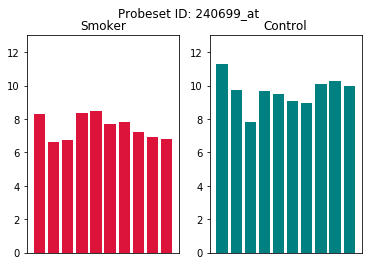

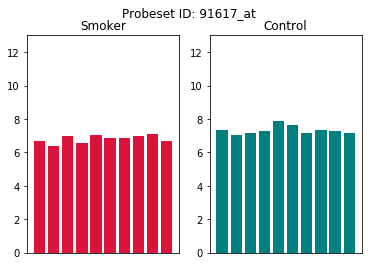

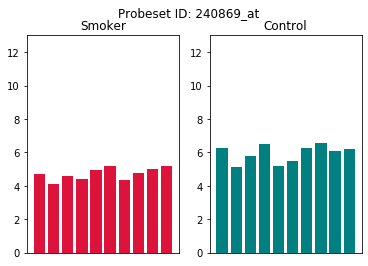

In [64]:
select_w_list= ['240699_at', '91617_at', '240869_at']
smoker_ttest = smoker_filt[non_smoker_list + smoker_list].loc[select_w_list]
for ii in smoker_ttest.index:
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.bar(smoker_list, smoker_ttest[smoker_list].loc[ii], color="#dc143c")
    plt.xticks(''); plt.title("Smoker"); plt.ylim(0, 13)
    ax2 = fig.add_subplot(122)
    ax2.bar(smoker_list, smoker_ttest[non_smoker_list].loc[ii], color="#008080")
    plt.xticks(''); plt.title("Control"); plt.ylim(0, 13)
    fig.suptitle("Probeset ID: %s" % ii)

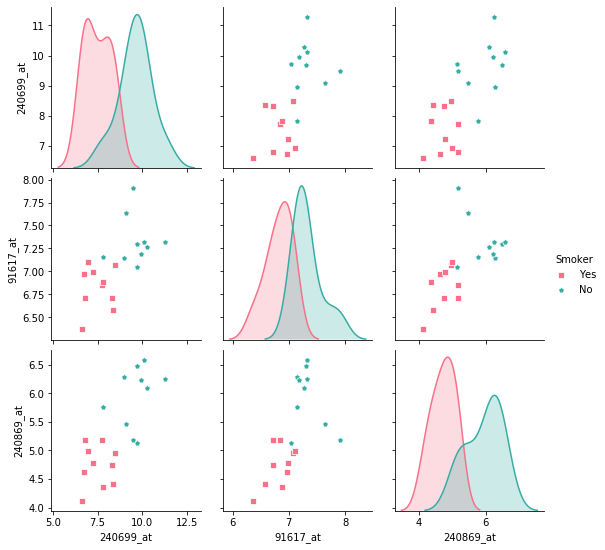

In [37]:
# Scatter plots combining the probesets
df_scatter_s = smoker_ttest[smoker_list].T
df_scatter_s['Smoker'] = 'Yes'
df_scatter_c = smoker_ttest[non_smoker_list].T
df_scatter_c['Smoker'] = 'No'
df_scatter = pd.concat([df_scatter_s, df_scatter_c], axis=0)
# print(df_scatter)
# print(df_scatter.index)
# Pairplot
pp = sns.pairplot(df_scatter, hue='Smoker', diag_kind='auto', markers=['s', 'p'], palette="husl")

## Question 3 Quiz: Comment the results based on your observations
## Anwser
**Firstly, up/down regulation in 6 selected genes**: observing the bar plot, reader can notice the expression ratio in test(smoke) and control(non-smoke) samples are up/down regulated.
compare the reference group for each samples:  
- 1552307_a_at: down regulation  
- 1552497_a_at: up regulation  
- 1552834_at: up regulation    
- 240699_at: down regulation  
- 91617_at: down regulation  
- 240869_at: down regulation  
  
**Secondly, for a specific gene to compare, though basically exists up or down regulation, the level of up or down regulation is different in different samples.** For example, take reference ID: 1552497_a_at as an example, the second sample in the smoker group is relatively in high expression ratio compared to others in the same group.
  
**Thirdly, the scatter plot indicates for the correlations/similarity between two selected genes: some are not correlated as the points can be divided into two clusters easily; some are correlated as the points are mixed together.** The "correlation" might be the evidence for the genes control the same functional categories, which would be mentioned in the part (h).

## (g) Question 4: Hierarchical Clustering and Dendrogram
- Wilcoxon Signed-Rank Test
- T-test

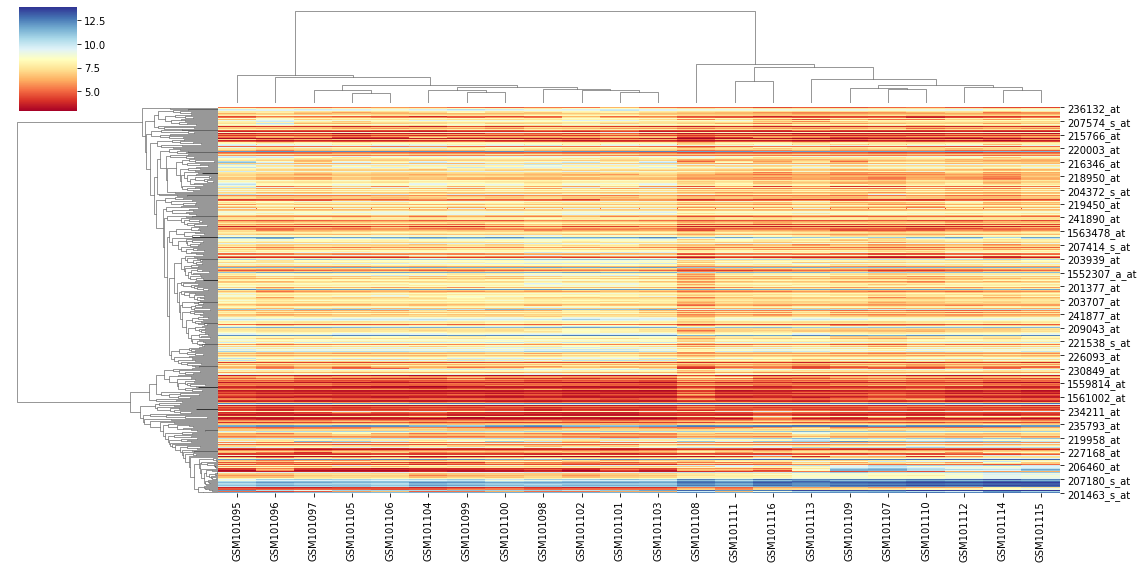

In [45]:
# Wilcoxon Signed-Rank Test
w_target_df = pd.DataFrame(smoker_filt, index=significant_inds_wilcox)
w_hc = sns.clustermap(w_target_df, method='average', metric='correlation', cmap='RdYlBu', figsize=(16, 8))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


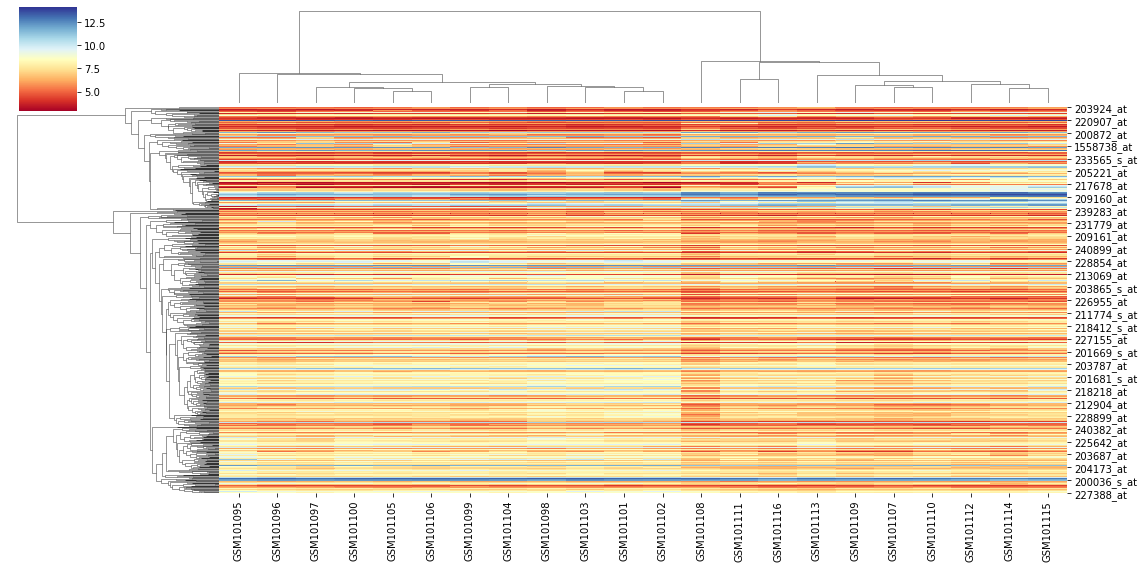

In [46]:
# T-test
t_target_df = pd.DataFrame(smoker_filt, index=significant_inds_ttest)
t_hc = sns.clustermap(t_target_df, method='average', metric='correlation', cmap='RdYlBu', figsize=(16, 8))

## Question 4 Quiz: Give a brief interpretation for the results.
## Anwser
- From Gene: most of the selected genes are up regulated or normal regulated, only an extremely part is down regulated (e.g. 207180_s_at in Wilcoxon Signed-Rank Test).  
- From Sample: it can be observed that the heatmap is splited into two "different" parts, which implies different expression patterns for control and test sample sets; in the same set(i.e. control set or test set), the expression patterns are quite similar.  
- From Dendrogram:    
 1. the relationships among different samples in one set(i.e. control set or test set) are quite random, however, the relationship among different sets is absolute the most estranged one.   
 2. the genes have most different expression pattern, have the most estranged relation; vice versa.  
 3. the genes have close relationship or be clustered into the same group should be highlighted, since they might control the similar/same functions.
- Although two test selected different differential expressed genes, for the same genes in two tests, the absolute expression value might be different, but the expression pattern rule remains similar.



## (h) Additional Part: Further Comments
### Introduction for Dataset  
- This experiment aims to understand how smoking modifies small airway structure and function. The dataset provided in the assignemnt is the second dataset in this project.   - Although the smokers were phenotypically normal, microarray analysis of gene expression of the small airway epithelium of the smokers compared to the nonsmokers demonstrated up- and down regulation of genes in multiple categories relevant to the pathogenesis of chronic obstructive lung disease (COPD), including genes coding for cytokines/innate immunity, apoptosis, mucin, response to oxidants and xenobiotics, and general cellular processes.
  
### Optimize Method for The Analysis of Assignment 4   
- Apply different p-value thresholds for different genes  
The Wilcoxon Signed-Rank test and Paired Sample T-Test here we applied only set one p-value for all the genes, however, the differential level for different genes diverse a lot. For example, the interleukin-4 (IL4) receptor gene with p < 0.002, the chemokine (C-X3-C motif) ligand 1 with p < 0.02, the spondin 2 with p < 0.04.  
![different pvalue](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs00109-006-0103-z/MediaObjects/109_2006_103_Fig5_HTML.gif?as=webp "different pvalue")
  
  
  
  

- Check the differential differences between the samples for constant variables.  
If we want to compare different samples, we need to make sure the differences brought by sample itself will not cause large impact, that is the pvalue for factors like age, gender and etc. should reject the test: no differences in age with p > 0.2, sex with p > 0.6, or race with p > 0.7 among the smokers and nonsmokers.  


  
- Cluster the genes according to functional category.  
It would be more signifcant if we cluster the gene to identify the gene function.
![functional clustering](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs00109-006-0103-z/MediaObjects/109_2006_103_Fig3_HTML.gif?as=webp "functional clustering")
